<a href="https://colab.research.google.com/github/SatyaRay003/Titanic-Survival-Prediction/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contents:

1. [Import all the necessary libraries](#Import-all-the-necessary-libraries)

2. [Basic Data Exploration](#Basic-Data-Exploration)

3. [Numerical Feature Analysis](#Numerical-Feature-Analysis)

    3.1 [Statistical Analysis](#Statistical-Analysis)

    3.2 [Multi-Variate Analysis](#Multi-Variate-Analysis)

    3.3 [Univariate Analysis](#Univariate-Analysis)

# Clone the repo

In [ ]:
!git clone https://github.com/SatyaRay003/Titanic-Survival-Prediction.git

# Import all the necessary libraries

In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(style="darkgrid", palette="muted", color_codes=True)

import warnings

# Basic Data Exploration

In [ ]:
train_df = pd.read_csv('/content/Titanic-Survival-Prediction/Data/train.csv')

In [ ]:
print(f'The Training Dataset contains, Rows: {train_df.shape[0]} & Columns: {train_df.shape[1]}')

The Training Dataset contains, Rows: 891 & Columns: 12


In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.head(10).style.background_gradient(cmap='icefire')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.458300,nan,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.862500,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.075000,nan,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.133300,nan,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.070800,nan,C


# Numerical Feature Analysis

In [ ]:
numeric_features = train_df.select_dtypes(exclude=['object']).columns

In [ ]:
numeric_features

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
numeric_df = train_df[numeric_features]

## Statistical Analysis

In [ ]:
numeric_df.describe().T.style.background_gradient(cmap='Pastel2')

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000000,446.000000,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.000000,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


### Heatmap

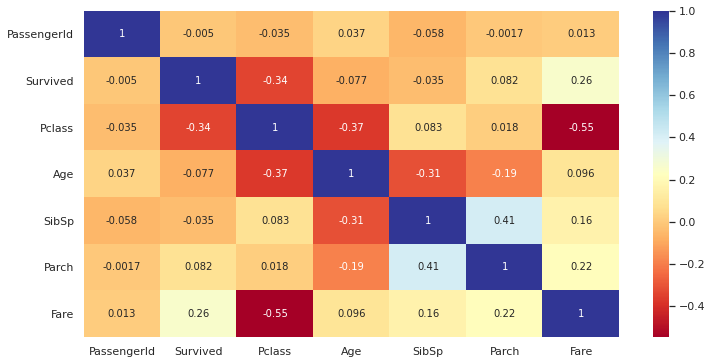

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdYlBu');

In [ ]:
numeric_features_correlation_df = pd.DataFrame(numeric_df.corr().Survived)

In [ ]:
abs(numeric_features_correlation_df).sort_values(by='Survived', ascending=False).style.background_gradient(cmap='coolwarm_r')

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007


### Remarks

> From the above Heat map we can extract following insights

1. **Pclass or Passenger Class** is most correlated numeric feature with **Survived** compared with other numeric features.

2. **Pclass or Passenger Class** and **Fare** have significant negative correlation value (***0.55***) which is as our expectation.

3. **SibSp** and **Parch** have significant positive correlation value (***0.41***)

4. **PassengerId** feature has no reasonable correlation value with any other features.


## Multi-Variate Analysis

### Pairplot

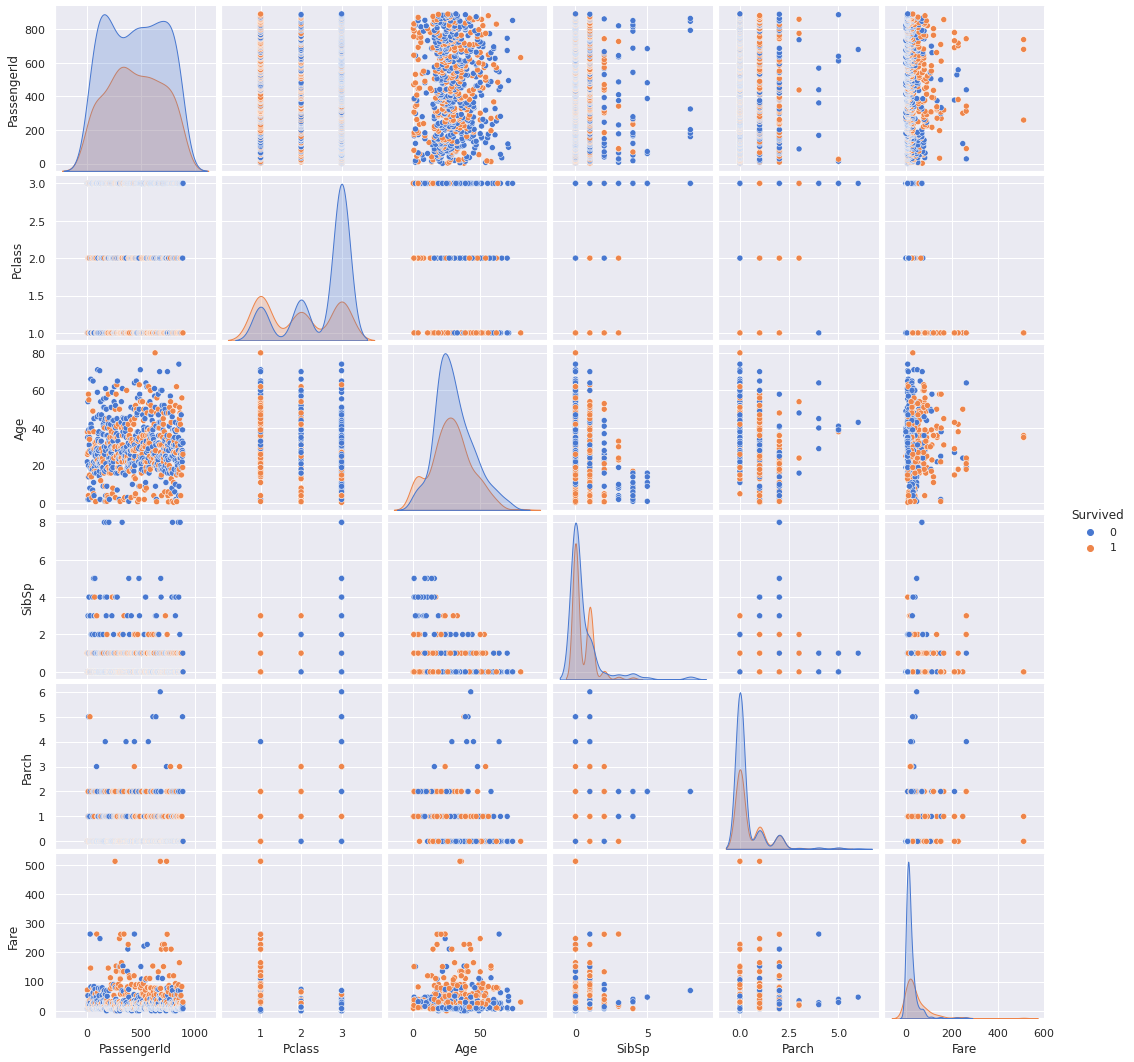

In [ ]:
sns.pairplot(numeric_df, hue='Survived');

## Univariate Analysis

### Target Attribute - Survived

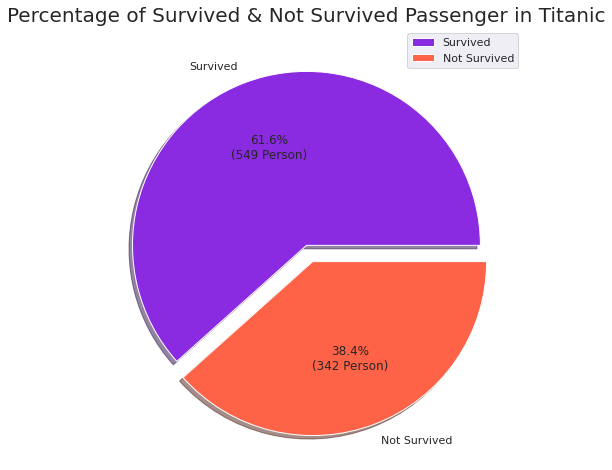

In [ ]:
size = list(numeric_df['Survived'].value_counts())
labels = ['Survived', 'Not Survived']
colors = ['blueviolet', 'tomato']
explode = [0, 0.1]

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%\n({:d} Person)".format(pct, absolute)

plt.subplots(figsize=(8,8))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, 
        autopct = lambda pct: func(pct, size), labeldistance=1.1)

plt.title('Percentage of Survived & Not Survived Passenger in Titanic', fontsize = 20)
plt.legend()
plt.show()

### Passesnger Class

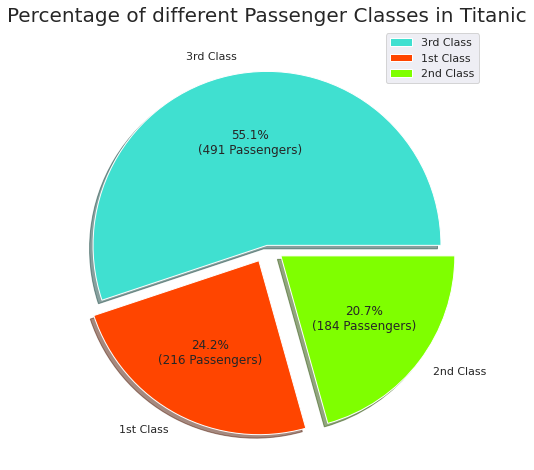

In [ ]:
size = list(numeric_df['Pclass'].value_counts())
labels = ['3rd Class', '1st Class', '2nd Class']
colors = ['turquoise', 'orangered', 'chartreuse']
explode = [0, 0.1, 0.1]

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%\n({:d} Passengers)".format(pct, absolute)

plt.subplots(figsize=(8,8))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, 
        autopct = lambda pct: func(pct, size), labeldistance=1.1)

plt.title('Percentage of different Passenger Classes in Titanic', fontsize = 20)
plt.legend()
plt.show()

In [384]:
def bar_plot(attribute, data, color, title, size, comparison = None):
    plt.figure(figsize=size)
    if comparison == None:
        ax = sns.countplot(x = attribute, data = data, palette=color)
    else:
        ax = sns.countplot(x = attribute, hue = comparison, data = data, palette=color)
    total = len(data)
    
    for i in ax.patches:
        percentage = '{:.2f}%'.format((i.get_height()/total)*100)
        x = i.get_x()
        y = i.get_height()
        ax.annotate(percentage, (x,y))
    plt.title(title, size = 20)

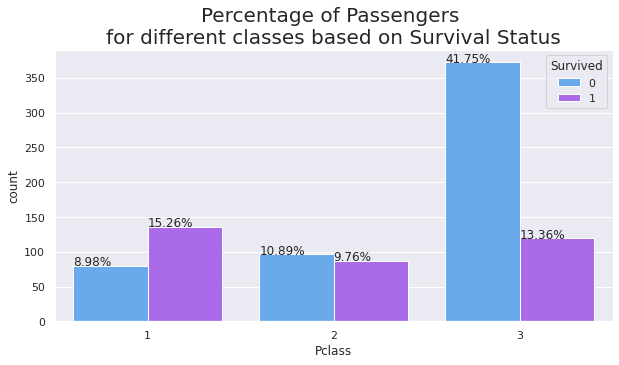

In [385]:
bar_plot('Pclass', numeric_df, 'cool', 
         "Percentage of Passengers \nfor different classes based on Survival Status", 
         (10, 5), 'Survived')

### Fare

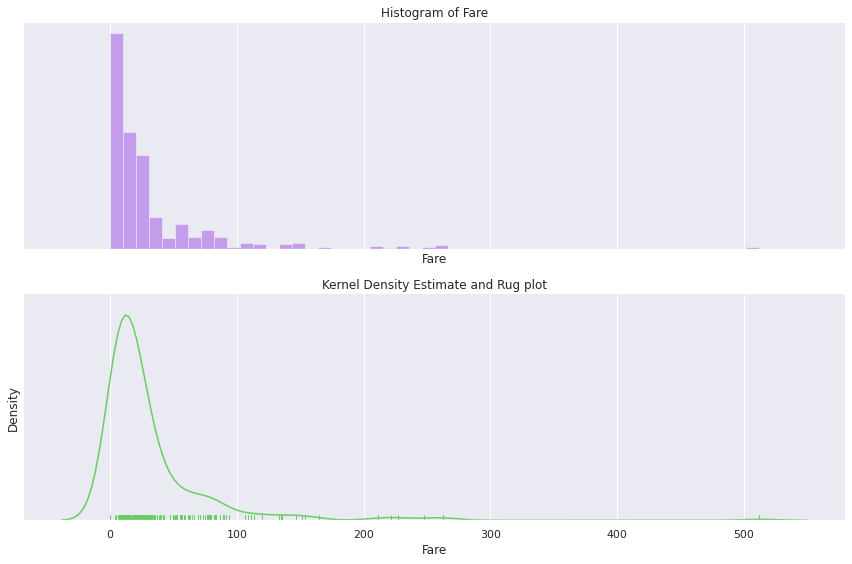

In [ ]:
sns.set(style="darkgrid", palette="muted", color_codes=True)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create a subplot
f, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(numeric_df.Fare, kde=False, color="blueviolet", ax=axes[0]).set_title('Histogram of Fare')

# Plot a kernel density estimate and rug plot
sns.distplot(numeric_df.Fare, hist=False, rug=True, color="g", ax=axes[1]).set_title('Kernel Density Estimate and Rug plot')

plt.setp(axes, yticks=[])
plt.tight_layout()

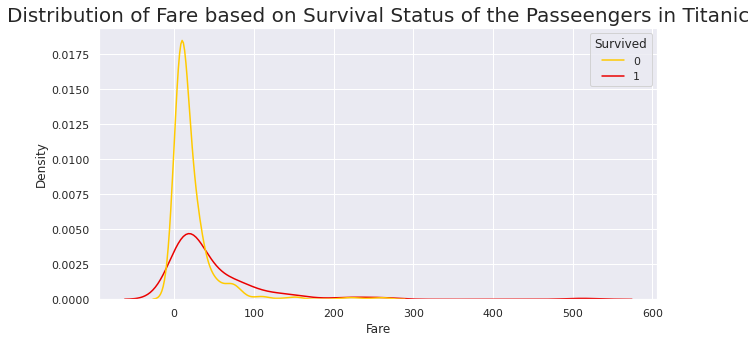

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=numeric_df, x='Fare', hue='Survived', palette="hot_r");
plt.title("Distribution of Fare based on Survival Status of the Passeengers in Titanic", fontsize = 20);

### Parch

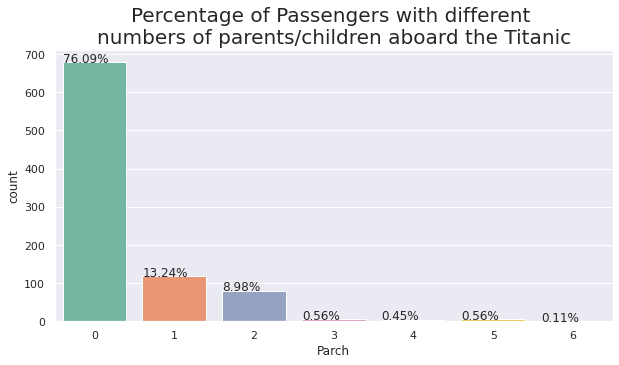

In [ ]:
bar_plot('Parch', numeric_df, 'Set2', 
         "Percentage of Passengers with different \nnumbers of parents/children aboard the Titanic")

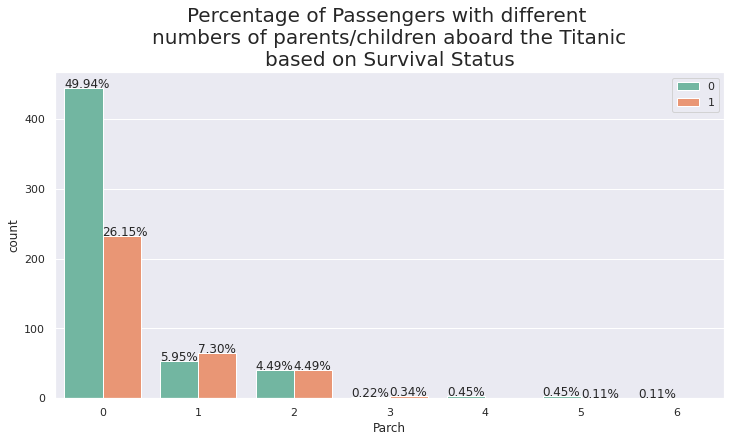

In [386]:
bar_plot('Parch', numeric_df, 'Set2', 
         "Percentage of Passengers with different \nnumbers of parents/children aboard the Titanic\nbased on Survival Status",
         (12, 6),'Survived')

plt.legend(loc='upper right');

### Age

> Note:
  We've considered the following age groups

  0 - 2 ---> Infant 

  2 - 4 ---> Toddler 

  4 - 9 ---> Child 

  9 -15 ---> Teenager 

  15 - 21 ---> Adult 

  21 - 44 ---> Mid-Age 

  44 - 60 ---> Middle Senior 

  60 - 80 ---> Old-Age

In [388]:
def Feature_Bin(attribute, data, title, comparison = None):
    
    new_df = data.copy()
    
    intervals = [0, 2, 4, 9, 15, 21, 44, 60, 80]
    labels = ['Infant', 'Toddler', 'Child', 'Teenager', 'Adult', 'Mid-Age', 'Middle Senior', 'Old-Age']
    
    a = 'Different {} Grouped_Value'.format(attribute)
    new_df[a] = pd.cut(x = new_df[attribute], bins = intervals, labels = labels, include_lowest=True)
    
    plt.figure(figsize=(15,8))
    
    if comparison == None:
        ax = sns.countplot(x = a, data = new_df, palette='hsv');
    else:
        ax = sns.countplot(x = a, data = new_df, hue = comparison, palette='hsv');
        
    total = len(new_df[a])
    
    for i in ax.patches:
        percentage = '{:.2f}%'.format((i.get_height()/total)*100)
        x=i.get_x()
        y=i.get_height()
        ax.annotate(percentage, (x,y))
        
    plt.title(title, size=20)

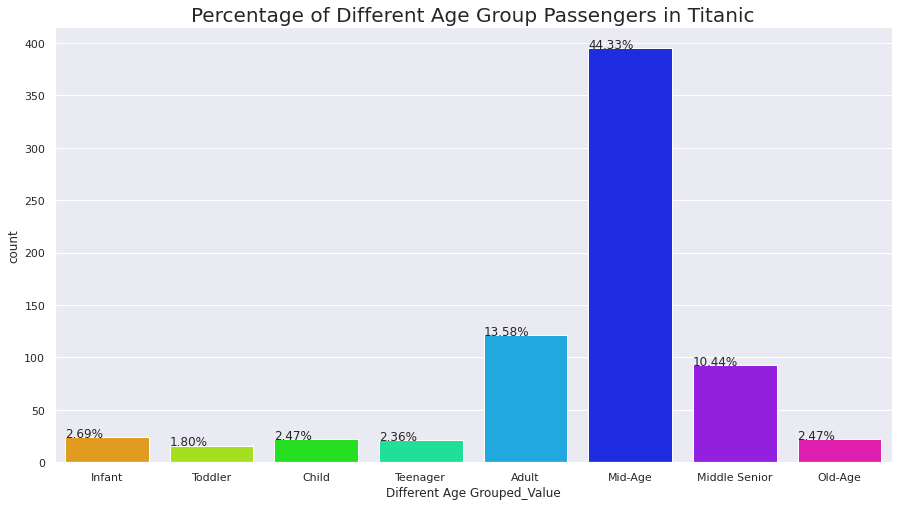

In [389]:
Feature_Bin('Age', numeric_df, 'Percentage of Different Age Group Passengers in Titanic')

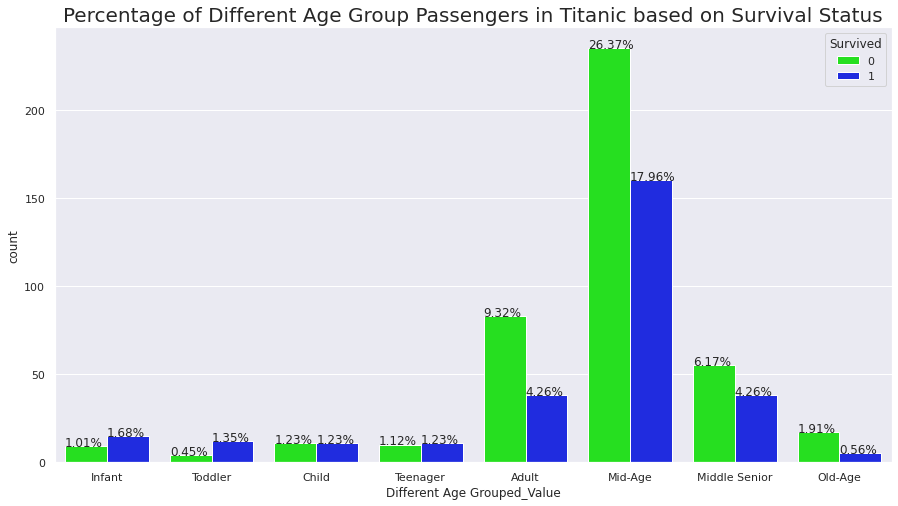

In [390]:
Feature_Bin('Age', numeric_df, 
            'Percentage of Different Age Group Passengers in Titanic based on Survival Status', 'Survived')

### SibSp

In [ ]:
numeric_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

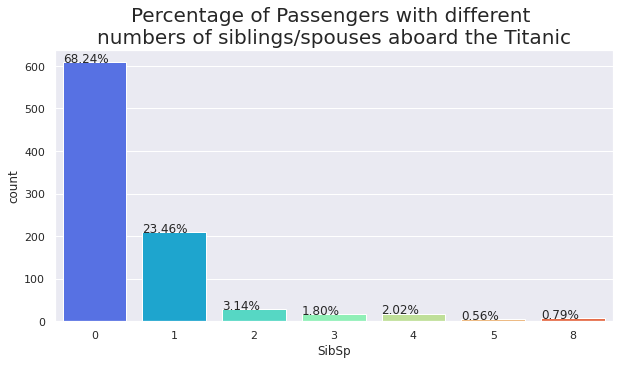

In [ ]:
bar_plot('SibSp', numeric_df, 'rainbow', 
         "Percentage of Passengers with different \nnumbers of siblings/spouses aboard the Titanic")

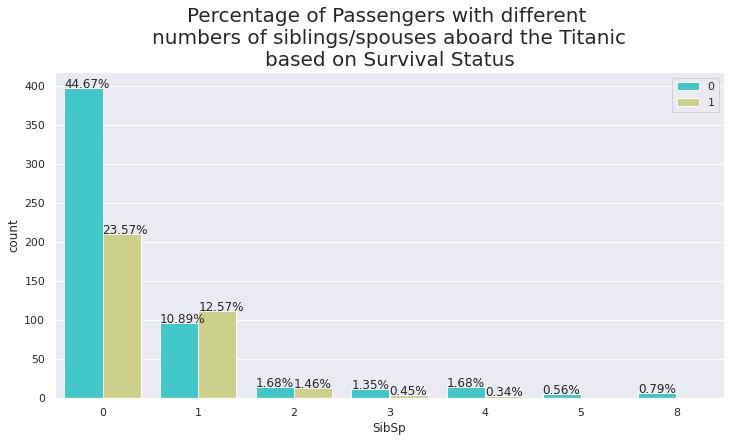

In [387]:
bar_plot('SibSp', numeric_df, 'rainbow', 
         "Percentage of Passengers with different \nnumbers of siblings/spouses aboard the Titanic\nbased on Survival Status",
         (12, 6), 'Survived')

plt.legend(loc='upper right');